In [1]:
!whoami
!date

nicoly
Mon Jun  7 02:48:37 PDT 2021


In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

# This is to calculate the PAF we need to get the wasting category specific incidences of the cause

## Population attributable risk fraction (PAF) that we need: the proportion of all cases (diarrhea or measles or lri) in the population (exposed and unexposed) that may be attributed to the wasting exposure, assuming a causal association.

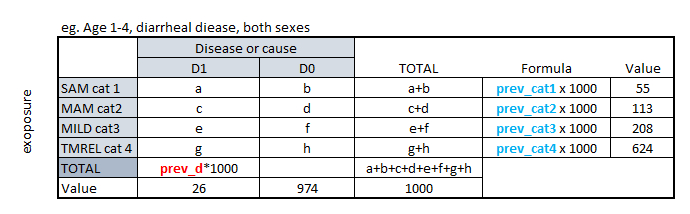

In [ ]:
# we can get 8 linearly independent equations to solve a-h

#  matrix


|equation|a|b|c|d|e|f|g|h|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1|1|1|0|0|0|0|0|0|
|2|0|0|1|1|0|0|0|0|
|3|0|0|0|0|1|1|0|0|
|4|0|0|0|0|0|0|1|1|
|5|1|0|1|0|1|0|1|0|
|6|624|0|0|0|0|0|-5830|0|
|7|0|0|624|0|0|0|-2599|0|
|8|0|0|0|0|624|0|-1456|0|



In [8]:
a = np.array([[1,1,0,0,0,0,0,0], #equation 1
              [0,0,1,1,0,0,0,0], #equation 2
              [0,0,0,0,1,1,0,0], #equation 3
              [0,0,0,0,0,0,1,1], #equation 4
              [1,0,1,0,1,0,1,0], #equation 5
              [624,0,0,0,0,0,-5830,0], #equation 6
              [0,0,624,0,0,0,-2599,0], #equation 7
              [0,0,0,0,624,0,-1456,0]])#equation 8 

In [9]:
b =np.array([[55], #equation 1
[113], #equation 2
[208], #equation 3
[624], #equation 4
[26],  #equation 5 #prevalence of diarrhea age-specific (1-4)
[0],  #equation 6
[0],  #equation 7
[0]]) #equation 8

In [10]:
x = np.linalg.solve(a,b)
x

array([[ 14.4238272 ],
       [ 40.5761728 ],
       [  6.43010753],
       [106.56989247],
       [  3.60224569],
       [204.39775431],
       [  1.54381958],
       [622.45618042]])

In [11]:
np.allclose(np.dot(a,x),b)

True

In [13]:
params = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
ParamDic = {}
for key in params:
    for value in x.tolist():
        ParamDic[key] = value
#         test_values.remove(value)b
        break  

# for i,j in params,x:
#     ParamDic

# ParamDic = zip(params, x)
print((ParamDic))

{'a': [14.423827195736989], 'b': [14.423827195736989], 'c': [14.423827195736989], 'd': [14.423827195736989], 'e': [14.423827195736989], 'f': [14.423827195736989], 'g': [14.423827195736989], 'h': [14.423827195736989]}


In [15]:
a = x[0][0]
b = x[1][0]
c = x[2][0]
d = x[3][0]
e = x[4][0]
f = x[5][0]
g = x[6][0]
h = x[7][0]


print(g)

1.5438195832143877


In [20]:
# RR of non-tmrel  
risk_exposed = (a+c+e)/(a+b+c+d+e+f)
risk_unexposed = g/(g+h)
rr_wasting = risk_exposed/risk_unexposed
rr_wasting

26.289893617021274

In [30]:
# Proportion of cases (eg. diarrhea) attributed to wasting exposure 

exposed = (a+b+c+d+e+f)/1000
print(exposed)
PAF_A = (exposed * (rr_wasting - 1))/(exposed * (rr_wasting - 1) + 1)
print('PAF = ' + str(PAF_A))

0.376
PAF = 0.9048434675040441


$$ \frac{Pe\times(RR-1)}{Pe\times(RR-1)+1} = PAF \ $$

# Try getting PAF with another equation

$$ \frac{\sum(Pcat)\times(RRcat)-1}{\sum(Pcat)\times(RRcat)} = PAF \ $$

In [33]:
p_cat1 = (a+b)/(1000)
p_cat2 = (c+d)/(1000)
p_cat3 = (e+f)/(1000)
p_cat4 = (g+h)/(1000)

rr_1 = 106
rr_2 = 23
rr_3 = 7
rr_4 = 1

PAF_B = (p_cat1*rr_1 + p_cat2*rr_2 + p_cat3*rr_3 + p_cat4*rr_4 - 1)/(p_cat1*rr_1 + p_cat2*rr_2 + p_cat3*rr_3 + p_cat4*rr_4)
PAF_B

0.9048434675040442

NOTE: These PAFs we calculated for incidence, should be the same as the PAF for death or YLLs because the cause duration across wasting categories is the same and the cause emrs across wasting categories are also the same. Therefore the PAF for incidence should be the same as the PAF for death/YLLS. 

TO DO: as a sanity check, we can compute the PAFs (draw level first, then mean) to see if they match those from GBD for death/ylls. 